<a href="https://colab.research.google.com/github/Pathu564/Cyber-Bullying-Detection-for-Code-Mixed-Texts/blob/main/notebooks/Hate_Speech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


After executing this, restart the session and then re run 1st cell and skip this cell

In [ ]:
!pip install numpy==1.24.3 --force-reinstall --no-cache-dir
!pip install transformers==4.30.2 --force-reinstall --no-cache-dir
!pip install gensim joblib ipywidgets --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 160.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
blosc2 3.3.2 requires numpy>=1.26, but you have numpy 1.24.3 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.24.3 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.3 which is incompatible.
pymc 5.22.0 requires numpy>=1.25.0, but you have numpy 1.24.3 which is incompatible.
albumentations 2.0.6 requires numpy>=1.24.4, but you have numpy 1.24.3 which is incompatible.
albucore 0.0.24 requires numpy>=1.24.4, but you have numpy 1.24.3 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have num

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.6/113.6 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 117.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 105.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 115.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 90.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.3/484.3 kB 211.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 187.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 kB 144.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 763.0/763.0 kB 184.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 792.7/792.7 kB 221.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 214.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 198.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 87.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 56.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sentence-transformers 3.4.1 requires transformers<5.0.0,>=4.41.0, but you have transformers 4.30.2 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [ ]:
import numpy
print("✅ NumPy Version:", numpy.__version__)

from transformers import AutoTokenizer, AutoModel
print("✅ Transformers import successful")


✅ NumPy Version: 1.26.4
✅ Transformers import successful


In [ ]:
import pandas as pd
mtext_df = pd.read_csv("/content/drive/MyDrive/bully_detection/muril_embeddings_final.csv")
emoji_df = pd.read_csv("/content/drive/MyDrive/bully_detection/emoji_embeddings.csv")

print("🔹 First row of TEXT dataset:")
print(mtext_df.head(1))



🔹 First row of TEXT dataset:
                                                Text  Label  embedding_0  \
0  mere tv installation ke liye reminder kab set hai      0     0.000423   

   embedding_1  embedding_2  embedding_3  embedding_4  embedding_5  \
0     0.004571    -0.001057    -0.017581    -0.000484     0.002345   

   embedding_6  embedding_7  ...  embedding_758  embedding_759  embedding_760  \
0    -0.004789    -0.004032  ...       0.005501      -0.000356      -0.009154   

   embedding_761  embedding_762  embedding_763  embedding_764  embedding_765  \
0       0.006191      -0.001633      -0.002097      -0.001856      -0.012672   

   embedding_766  embedding_767  
0      -0.001846      -0.003244  

[1 rows x 770 columns]


In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

X_text = mtext_df.drop(columns=["Text", "Label"])
y_text = mtext_df["Label"]

X_emoji = emoji_df.drop(columns=["Emoji", "Label"])
y_emoji = emoji_df["Label"]

X_text_train, X_text_test, y_text_train, y_text_test = train_test_split(
    X_text, y_text, test_size=0.2, random_state=42, stratify=y_text
)

X_emoji_train, X_emoji_test, y_emoji_train, y_emoji_test = train_test_split(
    X_emoji, y_emoji, test_size=0.2, random_state=42, stratify=y_emoji
)

print("✅ Train-test split completed successfully!")
print("🔹 X_text_train:", X_text_train.shape, "| y_text_train:", y_text_train.shape)
print("🔹 X_emoji_train:", X_emoji_train.shape, "| y_emoji_train:", y_emoji_train.shape)


✅ Train-test split completed successfully!
🔹 X_text_train: (16878, 768) | y_text_train: (16878,)
🔹 X_emoji_train: (671, 300) | y_emoji_train: (671,)


In [ ]:
from imblearn.combine import SMOTETomek

smote_tomek = SMOTETomek(random_state=42)
X_text_train_resampled, y_text_train_resampled = smote_tomek.fit_resample(X_text_train, y_text_train)

print("✅ SMOTE-Tomek applied on text dataset!")
print("🔹 X_text_train_resampled:", X_text_train_resampled.shape, "| y_text_train_resampled:", y_text_train_resampled.shape)

import numpy as np

np.save("m_X_text_train_resampled.npy", X_text_train_resampled)
np.save("m_y_text_train_resampled.npy", y_text_train_resampled)

np.save("/content/drive/MyDrive/bully_detection/f_X_emoji_train.npy", X_emoji_train)
np.save("/content/drive/MyDrive/bully_detection/f_y_emoji_train.npy", y_emoji_train)


print("✅ Processed data saved successfully!")


✅ SMOTE-Tomek applied on text dataset!
🔹 X_text_train_resampled: (18436, 768) | y_text_train_resampled: (18436,)
✅ Processed data saved successfully!


In [ ]:
import numpy as np

# Save test dataset to files
np.save("m_X_text_test.npy", X_text_test)
np.save("m_y_text_test.npy", y_text_test)

np.save("/content/drive/MyDrive/bully_detection/X_emoji_test.npy", X_emoji_test)
np.save("/content/drive/MyDrive/bully_detection/y_emoji_test.npy", y_emoji_test)

In [ ]:
import numpy as np
import torch
from torch.utils.data import TensorDataset, DataLoader

# Load from your path
X_train = np.load('m_X_text_train_resampled.npy')
y_train = np.load('m_y_text_train_resampled.npy')
X_test = np.load('m_X_text_test.npy')
y_test = np.load('m_y_text_test.npy')

# Convert to tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)

# Check shape
print(f"Train: {X_train_tensor.shape}, Test: {X_test_tensor.shape}")


Train: torch.Size([18436, 768]), Test: torch.Size([4220, 768])


DConvBilSTM Architecture

In [ ]:
import torch.nn as nn

class DConvBiLSTM(nn.Module):
    def __init__(self, input_dim=768, hidden_dim=128, output_dim=2, dropout_rate=0.5):
        super(DConvBiLSTM, self).__init__()
        self.depthwise_conv = nn.Conv1d(in_channels=1, out_channels=1, kernel_size=3, padding=1, groups=1)
        self.bilstm = nn.LSTM(input_size=input_dim, hidden_size=hidden_dim,
                              num_layers=1, batch_first=True, bidirectional=True)
        self.dropout = nn.Dropout(dropout_rate)
        self.fc = nn.Linear(hidden_dim * 2, output_dim)

    def forward(self, x):
        x = x.unsqueeze(1)  # [batch, 1, 768]
        x = self.depthwise_conv(x)  # [batch, 1, 768]
        x = x.squeeze(1).unsqueeze(1)  # [batch, 1, 768]
        lstm_out, _ = self.bilstm(x)
        out = lstm_out[:, -1, :]  # Take last time step
        out = self.dropout(out)
        out = self.fc(out)
        return out


Text Classification Model(DConvBiLSTM) Training

✅ Resumed from epoch 1400
Epoch 1401/1500 | Loss: 0.1447 | Accuracy: 0.9434
Epoch 1402/1500 | Loss: 0.1419 | Accuracy: 0.9451
Epoch 1403/1500 | Loss: 0.1427 | Accuracy: 0.9448
Epoch 1404/1500 | Loss: 0.1418 | Accuracy: 0.9451
Epoch 1405/1500 | Loss: 0.1423 | Accuracy: 0.9457
Epoch 1406/1500 | Loss: 0.1410 | Accuracy: 0.9438
Epoch 1407/1500 | Loss: 0.1431 | Accuracy: 0.9442
Epoch 1408/1500 | Loss: 0.1408 | Accuracy: 0.9459
Epoch 1409/1500 | Loss: 0.1409 | Accuracy: 0.9459
Epoch 1410/1500 | Loss: 0.1412 | Accuracy: 0.9444
Epoch 1411/1500 | Loss: 0.1395 | Accuracy: 0.9460
Epoch 1412/1500 | Loss: 0.1399 | Accuracy: 0.9441
Epoch 1413/1500 | Loss: 0.1411 | Accuracy: 0.9451
Epoch 1414/1500 | Loss: 0.1362 | Accuracy: 0.9489
Epoch 1415/1500 | Loss: 0.1400 | Accuracy: 0.9455
Epoch 1416/1500 | Loss: 0.1410 | Accuracy: 0.9452
Epoch 1417/1500 | Loss: 0.1414 | Accuracy: 0.9462
Epoch 1418/1500 | Loss: 0.1378 | Accuracy: 0.9462
Epoch 1419/1500 | Loss: 0.1397 | Accuracy: 0.9447
Epoch 1420/1500 | Loss: 

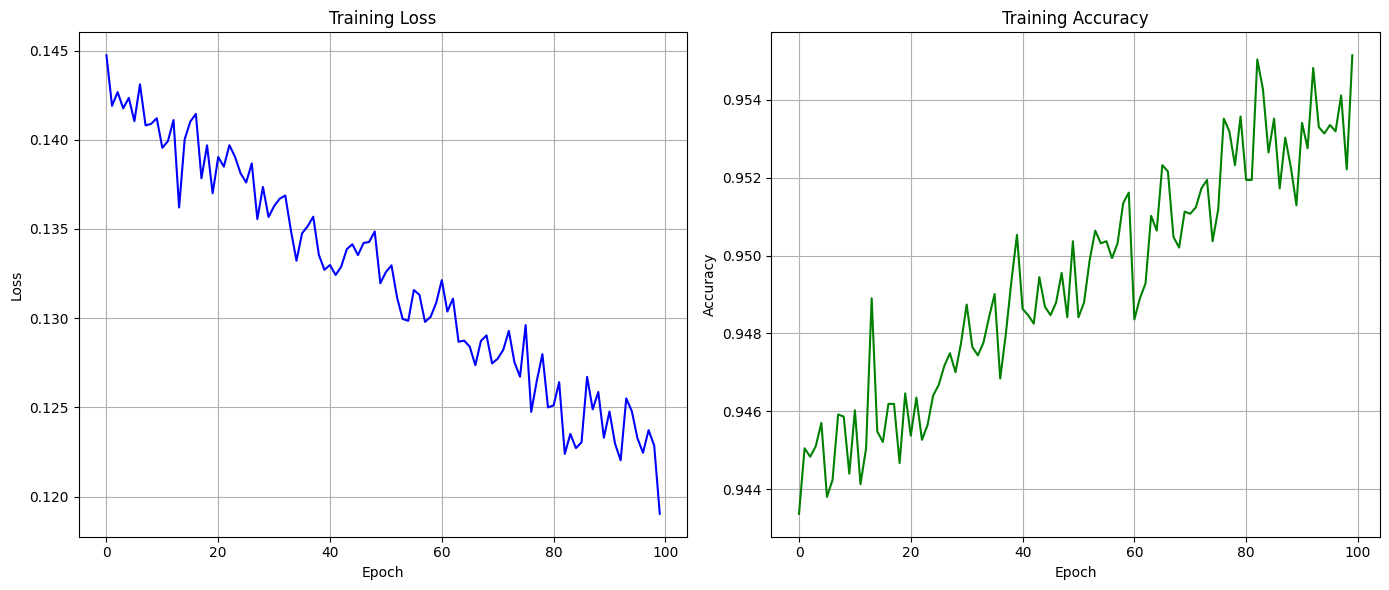

In [ ]:
import torch
import torch.nn.functional as F
from torch.optim import AdamW
import os
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = DConvBiLSTM().to(device)
optimizer = AdamW(model.parameters(), lr=5e-5)
criterion = nn.CrossEntropyLoss()

num_epochs = 1500
checkpoint_path = "/content/drive/MyDrive/bully_detection/Dconvbilstm_checkpoint.pth"
final_model_path = "/content/drive/MyDrive/bully_detection/Dconvbilstm_bully_model.pth"
log_path = "/content/drive/MyDrive/bully_detection/loss_accuracy_log.txt"

loss_history = []
accuracy_history = []

start_epoch = 0
if os.path.exists(checkpoint_path):
    checkpoint = torch.load(checkpoint_path, map_location=device)
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    start_epoch = checkpoint['epoch'] + 1
    print(f"✅ Resumed from epoch {start_epoch}")
else:
    print("📦 Starting from scratch")

for epoch in range(start_epoch, num_epochs):
    model.train()
    total_loss = 0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        predicted = torch.argmax(outputs, dim=1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    avg_loss = total_loss / len(train_loader)
    accuracy = correct / total

    loss_history.append(avg_loss)
    accuracy_history.append(accuracy)

    print(f"Epoch {epoch+1}/{num_epochs} | Loss: {avg_loss:.4f} | Accuracy: {accuracy:.4f}")

    if (epoch + 1) % 50 == 0:
        torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': avg_loss
        }, checkpoint_path)
        print(f"📌 Checkpoint saved at epoch {epoch+1}")

torch.save(model.state_dict(), final_model_path)
print("🎯 Final model saved!")

with open(log_path, "w") as f:
    for i, (l, acc) in enumerate(zip(loss_history, accuracy_history)):
        f.write(f"Epoch {i+1}, Loss: {l:.4f}, Accuracy: {acc:.4f}\n")
print("📝 Loss & accuracy log saved!")

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(loss_history, label="Loss", color="blue")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(accuracy_history, label="Accuracy", color="green")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training Accuracy")
plt.grid(True)

plt.tight_layout()
plt.show()


XGB + RF Model training

In [ ]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

# ✅ Define the ensemble model
ensemble_emoji = VotingClassifier(
    estimators=[
        ("xgb", XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=5, use_label_encoder=False, eval_metric="logloss", n_jobs=-1)),
        ("rf", RandomForestClassifier(n_estimators=200, n_jobs=-1))
    ],
    voting="soft"
)

# ✅ Train the model
ensemble_emoji.fit(X_emoji_train, y_emoji_train)

# ✅ Predict on test set
y_pred_ensemble_emoji = ensemble_emoji.predict(X_emoji_test)

# ✅ Calculate evaluation metrics
accuracy = accuracy_score(y_emoji_test, y_pred_ensemble_emoji)
precision = precision_score(y_emoji_test, y_pred_ensemble_emoji, average='weighted')
recall = recall_score(y_emoji_test, y_pred_ensemble_emoji, average='weighted')
f1 = f1_score(y_emoji_test, y_pred_ensemble_emoji, average='weighted')
conf_matrix = confusion_matrix(y_emoji_test, y_pred_ensemble_emoji)
class_report = classification_report(y_emoji_test, y_pred_ensemble_emoji)

# ✅ Print evaluation results
print(f"🚀 Accuracy: {accuracy * 100:.2f}%")
print(f"🧠 Precision (Weighted): {precision * 100:.2f}%")
print(f"🔁 Recall (Weighted): {recall * 100:.2f}%")
print(f"🎯 F1 Score (Weighted): {f1 * 100:.2f}%\n")

print("📊 Confusion Matrix:")
print(conf_matrix)

print("\n📋 Classification Report:")
print(class_report)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:55:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


🚀 Accuracy: 83.93%
🧠 Precision (Weighted): 83.46%
🔁 Recall (Weighted): 83.93%
🎯 F1 Score (Weighted): 82.40%

📊 Confusion Matrix:
[[121   5]
 [ 22  20]]

📋 Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.96      0.90       126
           1       0.80      0.48      0.60        42

    accuracy                           0.84       168
   macro avg       0.82      0.72      0.75       168
weighted avg       0.83      0.84      0.82       168



In [ ]:
import joblib

# Save the trained emoji ensemble model
joblib.dump(ensemble_emoji, '/content/drive/MyDrive/bully_detection/emoji_ensemble_model.pkl')

print("✅ Emoji ensemble model saved successfully!")


✅ Emoji ensemble model saved successfully!


In [ ]:
pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 8.0 MB/s eta 0:00:00


In [ ]:
import warnings
import logging
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import gensim
import joblib
from transformers import AutoTokenizer, AutoModel
import ipywidgets as widgets
from IPython.display import display
import re
import emoji

# Suppress warnings and logs
warnings.filterwarnings('ignore')
logging.getLogger("transformers").setLevel(logging.ERROR)
logging.getLogger("huggingface_hub").setLevel(logging.ERROR)

captured_warnings = []
def custom_warning_handler(message, category, filename, lineno, file=None, line=None):
    captured_warnings.append(str(message))
warnings.showwarning = custom_warning_handler

# ================== Load Emoji2Vec ==================
emoji2vec_path = "/content/drive/MyDrive/bully_detection/emoji2vec.bin"

if os.path.exists(emoji2vec_path):
    emoji2vec = gensim.models.KeyedVectors.load_word2vec_format(emoji2vec_path, binary=True)
else:
    raise FileNotFoundError("❌ Emoji2Vec file not found!")

# ================== Define DConvBiLSTM ==================
class DConvBiLSTM(nn.Module):
    def __init__(self, input_dim=768, hidden_dim=128, output_dim=2, dropout_rate=0.5):
        super(DConvBiLSTM, self).__init__()
        self.depthwise_conv = nn.Conv1d(in_channels=1, out_channels=1, kernel_size=3, padding=1, groups=1)
        self.bilstm = nn.LSTM(input_size=input_dim, hidden_size=hidden_dim,
                              num_layers=1, batch_first=True, bidirectional=True)
        self.dropout = nn.Dropout(dropout_rate)
        self.fc = nn.Linear(hidden_dim * 2, output_dim)

    def forward(self, x):
        x = x.unsqueeze(1)
        x = self.depthwise_conv(x)
        x = x.squeeze(1).unsqueeze(1)
        lstm_out, _ = self.bilstm(x)
        out = lstm_out[:, -1, :]
        out = self.dropout(out)
        out = self.fc(out)
        return out

# ================== Load Models ==================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
text_model = DConvBiLSTM().to(device)
text_model.load_state_dict(torch.load("/content/drive/MyDrive/bully_detection/dconvbilstm_bully_model.pth", map_location=device))
text_model.eval()

emoji_classifier = joblib.load("/content/drive/MyDrive/bully_detection/emoji_ensemble_model_fixed.pkl")

tokenizer = AutoTokenizer.from_pretrained("google/muril-base-cased")
muril_model = AutoModel.from_pretrained("google/muril-base-cased").to(device)
muril_model.eval()

# ================== Functions ==================
def split_text_and_emoji(text):
    """Separate text and emojis from mixed input"""
    emoji_list = []
    text_list = []

    for char in text:
        if emoji.is_emoji(char):
            emoji_list.append(char)
        else:
            text_list.append(char)

    text_only = ''.join(text_list).strip()
    emoji_only = ''.join(emoji_list).strip()

    return text_only, emoji_only

def get_muril_embedding(text):
    tokens = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=128)
    input_ids = tokens["input_ids"].to(device)
    attention_mask = tokens["attention_mask"].to(device)
    with torch.no_grad():
        outputs = muril_model(input_ids=input_ids, attention_mask=attention_mask)
    embedding = outputs.last_hidden_state.mean(dim=1).squeeze().cpu().numpy()
    return embedding

def get_emoji_embedding(emoji_str):
    if emoji_str:
        embeddings = []
        for emoji_char in emoji_str:
            if emoji_char in emoji2vec:
                embeddings.append(emoji2vec[emoji_char])
            else:
                embeddings.append(np.zeros(300))
        return np.mean(embeddings, axis=0)
    return np.zeros(300)

def predict_input(user_input):
    text_part, emoji_part = split_text_and_emoji(user_input)

    text_proba = None
    emoji_proba = None

    if text_part:
        embedding = get_muril_embedding(text_part)
        input_tensor = torch.tensor(embedding, dtype=torch.float32).unsqueeze(0).to(device)
        with torch.no_grad():
            output = text_model(input_tensor)
            text_proba = F.softmax(output, dim=1).cpu().numpy()[0]

    if emoji_part:
        emoji_features = get_emoji_embedding(emoji_part)
        emoji_input = np.array(emoji_features).reshape(1, -1)
        emoji_proba = emoji_classifier.predict_proba(emoji_input)[0]

    if text_proba is not None and emoji_proba is not None:
        final_proba = (text_proba + emoji_proba) / 2
    elif text_proba is not None:
        final_proba = text_proba
    elif emoji_proba is not None:
        final_proba = emoji_proba
    else:
        return None, "⚠️ No valid input detected."

    label = np.argmax(final_proba)
    result = "Bully" if label == 1 else "Not Bully"

    return final_proba, result, text_part, emoji_part

# ================== UI Using ipywidgets ==================
input_box = widgets.Text(value='', placeholder='Type your message with or without emoji...', description='Input:')
predict_button = widgets.Button(description="Predict")
output = widgets.Output()

def on_predict_button_click(b):
    user_input = input_box.value.strip()

    with output:
        output.clear_output(wait=True)

        if not user_input:
            print("⚠️ Please enter valid text or emojis.")
            return

        final_proba, result, text_part, emoji_part = predict_input(user_input)

        if final_proba is None:
            print("⚠️ Please enter valid text or emojis.")
            return

        if text_part:
            print(f"📝 Extracted Text: {text_part}")
        if emoji_part:
            print(f"😊 Extracted Emojis: {emoji_part}")

        if text_part and not emoji_part:
            print(f"📝 Text Model Confidence (Bully): {final_proba[1]*100:.2f}%")
            print(f"🧠 Final Prediction: {result}")

        elif emoji_part and not text_part:
            print(f"😊 Emoji Model Confidence (Bully): {final_proba[1]*100:.2f}%")
            print(f"🧠 Final Prediction: {result}")

        elif text_part and emoji_part:
            print(f"📝 Text Model Confidence (Bully): {final_proba[1]*100:.2f}%")
            print(f"😊 Emoji Model Confidence (Bully): {final_proba[1]*100:.2f}%")
            print(f"🧠 Final Prediction: {result} (Confidence: {final_proba[np.argmax(final_proba)]*100:.2f}%)")

predict_button.on_click(on_predict_button_click)

display(input_box, predict_button, output)


tokenizer_config.json:   0%|          | 0.00/206 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/411 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/3.16M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/113 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/953M [00:00<?, ?B/s]

Text(value='', description='Input:', placeholder='Type your message with or without emoji...')

Button(description='Predict', style=ButtonStyle())

Output()